# Exploratory Notebook

In [1]:
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

## Business Question
1. What are the currrent trends by genres in the Box Office
   What genres perform best? - 
2. What budget ranges for movies are the most profitable -  to avoid spending too much, and increase ROI
3. Which actors and directors/ pull in more audiences
4. What are the average lengths of films that perform well

# 🎬 Exploratory Data Analysis (EDA): Box Office Movie Insights

## 📌 Objective
Our goal is to explore what types of films are currently performing best at the box office, in order to guide our company’s new movie studio toward data-driven content creation.

---

## 1. 🗂️ Data Overview

- Load the dataset
- Preview the first few rows
- Check shape, column names, and data types
- Identify missing values and duplicates

```python
df.shape
df.columns
df.info()
df.head()
df.isnull().sum()
df.duplicated().sum()

In [3]:
# open tmdb.movis.csv 

df= pd.read_csv('zippedData/tmdb.movies.csv.gz')

df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  genre_names        26517 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


## Clean the Dataset
Steps:
* Drop unnecessary columns (Unnamed: 0).
* Check and handle missing values.
* Check rows where vote_count is zero or very low
* Check movies with zero popularity
* Drop movies with vote_average < 4
* Drop movies with vote_count < 100
* Reset index after dropping rows
* Display the number of remaining rows and the first few cleaned records

In [4]:
# Drop the 'Unnamed: 0' column if it exists
if "Unnamed: 0" in df.columns:
    df_cleaned = df.drop(columns=["Unnamed: 0"])
else:
    df_cleaned = df.copy() 

# Convert release_date to datetime
df_cleaned["release_date"] = pd.to_datetime(df_cleaned["release_date"], errors="coerce")

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check rows where vote_count is zero or very low
low_vote_movies = df_cleaned[df_cleaned["vote_count"] < 10]
print("\nMovies with very low vote count:\n", low_vote_movies.head())

# Check movies with zero popularity
zero_popularity_movies = df_cleaned[df_cleaned["popularity"] == 0]
print("\nMovies with zero popularity:\n", zero_popularity_movies.head())

# Drop movies with vote_average < 4
df_cleaned = df_cleaned[df_cleaned["vote_average"] >= 4]

# Drop movies with vote_count < 100
df_cleaned = df_cleaned[df_cleaned["vote_count"] >= 100]

# Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

# Display the number of remaining rows and the first few cleaned records
print("\nShape of Cleaned Dataset (Rows, Columns):", df_cleaned.shape)
print("\nFirst 5 Rows of Cleaned Dataset:\n", df_cleaned.head())

Missing Values in Each Column:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Movies with very low vote count:
         genre_ids     id original_language  \
481          [18]  66111                en   
483  [27, 28, 53]  44224                en   
505   [18, 10749]  63414                te   
552      [12, 28]  45611                en   
554  [80, 18, 53]  39478                en   

                                  original_title  popularity release_date  \
481                                       Luster       4.309   2010-12-12   
483                                         Bear       4.288   2010-01-01   
505                                    డార్లింగ్       4.029   2010-04-23   
552  Jack Hunter and the Lost Treasure of Ugarit       3.471   2010-07-31   
554                               Stripped Naked   

# Visualizing the Findings
* I'll create two visualizations:

* Top 10 Most Popular Movies

* Distribution of Average Ratings


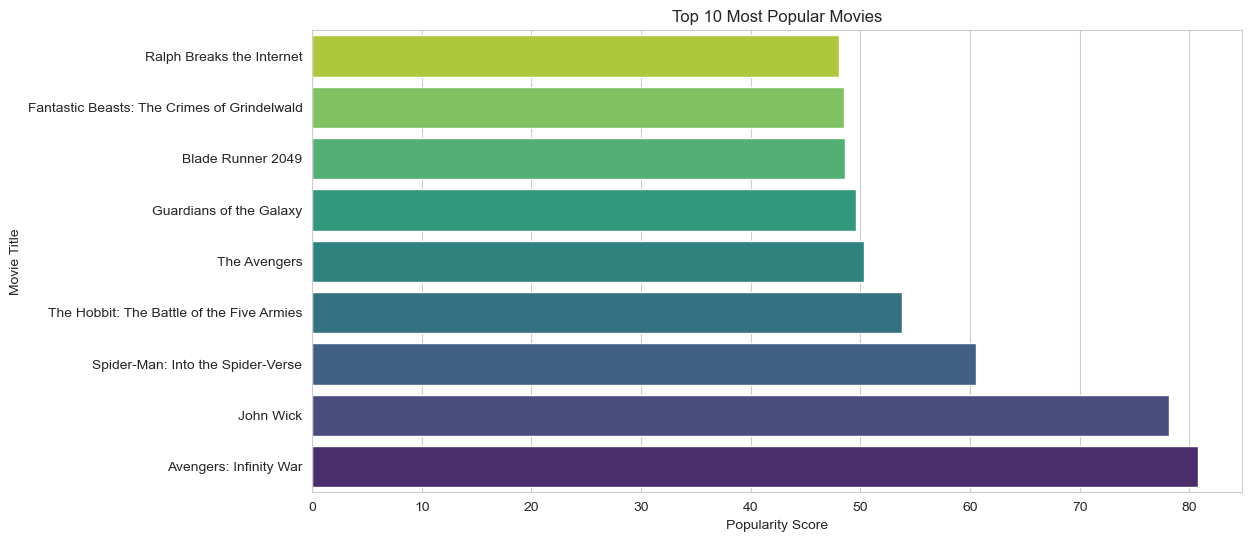

In [6]:
# 1. Top 10 Most Popular Movies
top_popular_movies = df_cleaned.nlargest(10, "popularity")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_popular_movies["title"], x=top_popular_movies["popularity"], palette="viridis")
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Popular Movies")
plt.gca().invert_yaxis()  # Invert for readability
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


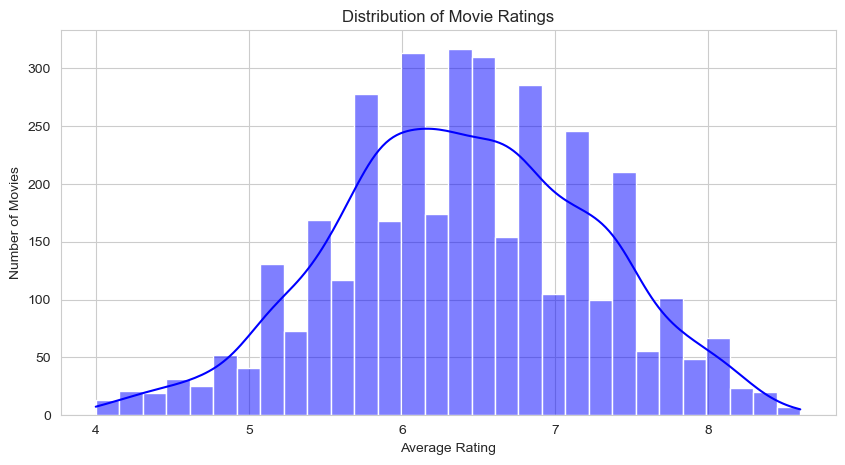

In [7]:
# 2. Distribution of Vote Averages
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["vote_average"], bins=30, kde=True, color="blue")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()

Analysis to provide insights for improving business strategies. ​

## QUESTIONS TO ANSWER

# 3. Which movies, actors, and directors pull in more audiences (what makes a movie popular?)

### Helps identify trends in genre, actors, or directors that drive popularity.
* A well-crafted story and high production quality increase ratings, making movies more appealing.
* The most popular movies have very high audience interest (These successful films can guide marketing strategies and content selection to attract more viewers).
* Very useful for planning marketing strategies and future investments. 
